
<center><h1 style="color:#1a1a1a;
                    font-size:3em">
        Machine Learning
        </h1> 
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        TP1: Supervised Learning
       </h2>
</center>

<p style="font-size:2em">📜 Table of Content:</p><br>
<div style="font-size:1.5em">
    <ul>
       <li>
          <a href="#pre-processing">Prepare a dataset 📂</a>
       </li><br>
       <li>
          <a href="#model-building">Building models 🛠️</a>
       </li><br>
       <li>
          <a href="#Prediction">Fit the model and make a prediction ⚙️</a>
       </li><br>
       <li>
          <a href="#model-eval">Evaluate model predictions 📉</a>
       </li><br>
    </ul>
</div>

<h4 style="color:grey"> Importing Liberaries</h4>

In [1]:
# Setup Matplotlib to plot inline ( within the notebook ) 
%matplotlib inline
import matplotlib

# Import the pyplot module of Matplotlib as plt
import matplotlib.pyplot as plt

# Import pandas under the abbreviation 'pd'
import pandas as pd

# Import numPy under the abbreviation 'np'
import numpy as np


In [2]:
#  ignore wornings
import warnings

warnings.filterwarnings("ignore")

We will start with heart-disease.csv, a “Dataset” containing anonymous data
about patients and whether or not they have heart disease

<div id="pre-processing">
        <h1 style="color:#1a1a1a">
         Prepare a dataset 📂
        </h1>
</div>

In [3]:
# Import the heart disease dataset an save it to a variable
# using pandas and read_csv()

heart_disease = pd.read_csv("heart-disease.csv")

# Check the first 5 rows of the data
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Our goal here is to create a machine learning model on all columns at
exception of target to predict target.<br><br>
In essence, the target column is our target variable (also called y or label) and the
rest of the other columns are our independent variables (also called data or
X).<br><br>
Since our target variable is a category (heart disease or not), what is the type of ML problem we need to solve?<br><br>
Knowing that, let's create x and y by splitting a dataframe.

In [4]:
# Create X (all the feature columns)
X = heart_disease.drop("target", axis=1)

# Create y (the target column)
y = heart_disease["target"]

Now that we've split our data into x and y, we'll use Scikit-Learn to
divide them into training and testing sets.

In [5]:
# import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split

# Use train_test_split to split x $ y into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
# View the different shapes of the training and test datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

Since our data is now in training and test sets,
we will create a machine learning model to fit the models in the
training data and then make predictions on the test data.<br><br>
To determine which machine learning model we should use, you can
refer to ["Scikit-Learn's machine learning map"](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) .<br><br>
After following the map, you decide to use the RandomForestClassifier.

<div id="model-building">
        <h1 style="color:#1a1a1a">
         Building models 🛠️
        </h1>
</div>

In [7]:
# Import the RandomForestClassifier from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

# instantiate an instance of RandomForestClassifier as clf
clf = RandomForestClassifier()

Now that you have a RandomForestClassifier instance, let's fit it to the data
training.<br><br>
Once it is matched, we will make predictions on the test data.

<div id="Prediction">
        <h1 style="color:#1a1a1a">
         Fit the model and make a prediction ⚙️
        </h1>
</div>

In [8]:
# Fit the RandomForestClassifier to the training data

clf.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
# Use the fitted model to make predictions on the test data and 
# save the predictions to a variable called y_preds

y_preds = clf.predict(X_test)

<div id="model-eval">
        <h1 style="color:#1a1a1a">
         Evaluate model predictions 📉
        </h1>
</div>

Evaluating predictions is very important. Let's check how our model by calling the
score() method and passing it the training (X_train, y_train) and test data
(X_test, y_test).

In [10]:
# Evaluate the fitted model on the traning set using the score() function

clf.score(X_train, y_train)

1.0

In [11]:
# Evaluate the model on the test set

clf.score(X_test, y_test)

0.7631578947368421

 <h4 style="color:grey">How did the model perform?</h4>

The model has performed very well on the traning data and decent on the test data.

 <h4 style="color:grey">What metric does the score() function return for classifiers?</h4>

In the case of classifiers the score() function return the accuracy of the model on a specific data.

 <h4 style="color:grey">Did your model perform better with the training dataset or
the test data set?</h4>

Because It was trained on that data so it's more "optimized for it" as for test data it has never seen it.

Let's use the classification_report provided by sklearn

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70        29
           1       0.82      0.79      0.80        47

    accuracy                           0.76        76
   macro avg       0.75      0.76      0.75        76
weighted avg       0.77      0.76      0.76        76



Let's print the confusion matrix and see to see our results

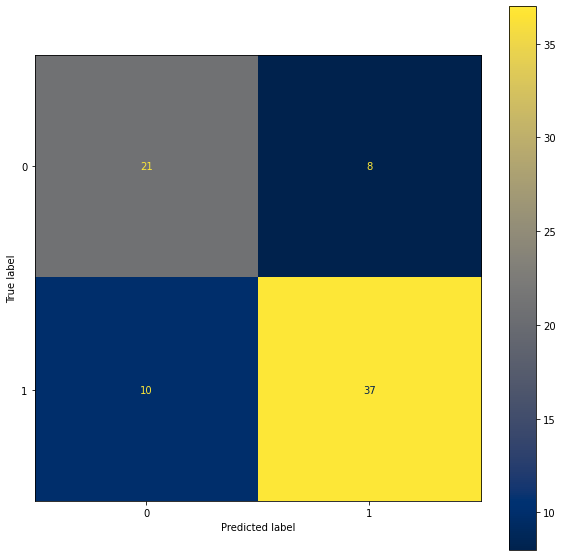

In [13]:
from sklearn.metrics import  ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax=ax, cmap='cividis')

In [14]:
from sklearn.metrics import  accuracy_score

accuracy_score(y_test, y_preds)

0.7631578947368421

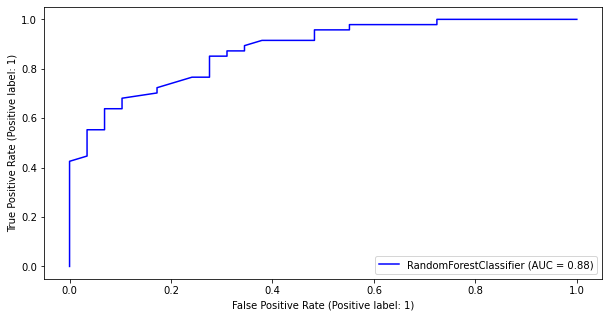

In [15]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fig, ax = plt.subplots(figsize=(10, 5))

disp = RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, color="b")

 <h4 style="color:grey">Experiment with different classification models</h4>

We have now quickly covered the Scikit-Learn workflow from start to finish and since experimentation is a big part of machine learning, we will now try a series of different machine learning models and see which one performs the best on our dataset.<br><br>
Looking through the Scikit-Learn sheet, we see that there are a number of different classification models that we can try (different models are in the green boxes).<br><br>
For this exercise, the models we are going to try to compare are:<br><br>
• LinearSVC
• KNeighborsClassifier (K-Nearest Neighbors or KNN)
• SVC (support vector classifier, a form of support vector machine)
• LogisticRegression (despite the name, it's actually a classifier)
• RandomForestClassifier (a set method)
<br><br>
We will follow the same workflow we used above (except this time for several
models):<br><br>
1- Import a machine learning model
2- Prepare it
3- Fit it to the data and make predictions
4- Evaluate the fitted model
<br><br>
Note: Since we already have the data ready, we can reuse it in
this section.

In [16]:
# Import LinearSVC from sklearn's svm module
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier from sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Import SVC from sklearn's svm module
from sklearn.svm import SVC

# Import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression

Since the Scikit-Learn's API design is consistent, we can use
virtually the same code to adjust, evaluate and make predictions with each of our models.<br><br>
To see which model works best, we'll do the following:<br><br>
1- Instantiate each model in a dictionary
2- Create an empty result dictionary
3- Fit each model to the training data
4- Evaluate each model on the test data
5- Check the results
<br><br>
If you're wondering what it means to instantiate each pattern in a dictionary,
see the example below.

In [17]:
# EXAMPLE: Instantiating a RandomForestClassifier() in a dictionary
example_dict = {"RandomForestClassifier": RandomForestClassifier()}

# Create a dictionary called models which contains all of the classification models we've imported
# Make sure the dictionary is in the same format as example_dict
# The models dictionary should contain 5 models
models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()}

# Create an empty dictionary called results
results = {}

Since each model we're using has the same fit() and score() functions, we can loop through our models dictionary and, call fit() on the training data and then call score() with the test data

In [18]:
# EXAMPLE: Looping through example_dict fitting and scoring the model
example_results = {}
for model_name, model in example_dict.items():
    model.fit(X_train, y_train)
    example_results[model_name] = model.score(X_test, y_test)

# EXAMPLE: View the results
example_results  

{'RandomForestClassifier': 0.7631578947368421}

In [19]:
# Loop through the models dictionary items, fitting the model on the training data
# and appending the model name and model score on the test data to the results dictionary
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

# View the results
results

{'LinearSVC': 0.618421052631579,
 'KNN': 0.631578947368421,
 'SVC': 0.6578947368421053,
 'LogisticRegression': 0.8157894736842105,
 'RandomForestClassifier': 0.8157894736842105}

 <h4 style="color:grey">Which model performed the best?</h4>

The Logistic Regression has performed the best.

 <h4 style="color:grey">Do the results change each time you run the cell?</h4>

Yes the results change each time we run the cell.

 <h4 style="color:grey">If it changes, why do you think?</h4>

Due to the randomness of how each model finds patterns in the data, you might notice different results each time.

Let's use the classification_report provided by sklearn

<AxesSubplot:>

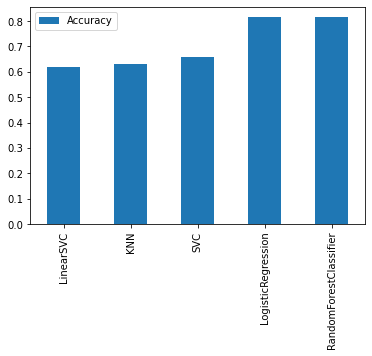

In [39]:
# Create a pandas dataframe with the data as the values of the results dictionary,
# the index as the keys of the results dictionary and a single column called accuracy.
# Be sure to save the dataframe to a variable.
results_df = pd.DataFrame(results.values(), 
                          results.keys(), 
                          columns=["Accuracy"])

# Create a bar plot of the results dataframe using plot.bar()
results_df.plot.bar()

 <h4 style="color:grey">Hyperparameter Tuning</h4>

In [21]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20), 
               "solver": ["liblinear"]}

In [28]:
# Setup np random seed of 42
np.random.seed(42)

# Import RandomizedSearchCV from sklearn's model_selection module
from sklearn.model_selection import RandomizedSearchCV

# Setup an instance of RandomizedSearchCV with a LogisticRegression() estimator,
# our log_reg_grid as the param_distributions, a cv of 5 and n_iter of 5.
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=5,
                                verbose=False)

# Fit the instance of RandomizedSearchCV
rs_log_reg.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=False)

In [29]:
# Find the best parameters of the RandomizedSearchCV instance using the best_params_ attribute

rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [30]:
# Score the instance of RandomizedSearchCV using the test data

rs_log_reg.score(X_test, y_test)

0.8026315789473685

 <h4 style="color:grey">Classifier model evaluation</h4>

In [31]:
# Instantiate a LogisticRegression classifier using the best hyperparameters from RandomizedSearchCV
clf = LogisticRegression(solver="liblinear", C=0.23357214690901212)

# Fit the new instance of LogisticRegression with the best hyperparameters on the training data 
clf.fit(X_train, y_train);

In [32]:
# Import confusion_matrix and classification_report from sklearn's metrics module
from sklearn.metrics import confusion_matrix, classification_report

# Import precision_score, recall_score and f1_score from sklearn's metrics module
from sklearn.metrics import precision_score, recall_score, f1_score

# Import plot_roc_curve from sklearn's metrics module
from sklearn.metrics import plot_roc_curve

In [33]:
# Make predictions on test data and save them
y_preds = clf.predict(X_test)

In [36]:
# Create a confusion matrix using the confusion_matrix function

cf_matrix = confusion_matrix(y_test, y_preds)

<AxesSubplot:>

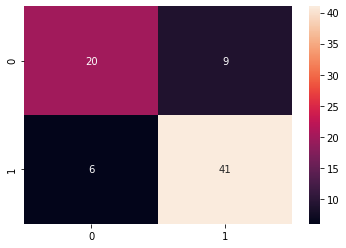

In [38]:
# Create a more visual confusion matrix
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [40]:
# Create a classification report using the classification_report function
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.77      0.69      0.73        29
           1       0.82      0.87      0.85        47

    accuracy                           0.80        76
   macro avg       0.79      0.78      0.79        76
weighted avg       0.80      0.80      0.80        76



In [ ]:
2